SPAM SMS DETECTION: Build an AI model that can classify SMS messages as spam or
legitimate. Use techniques like TF-IDF or word embeddings with
classifiers like Naive Bayes, Logistic Regression, or Support Vector
Machines to identify spam messages

Qasim Hasan

ML TASK 4: SPAM SMS DETECTION

CodSoft Internship Project Assignment @CodSoft

Project 2

https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/code Downloaded csv file from this link provided

In [1]:
#Libraries that will be used in this Project ML: Spam Sms Detection

 # Operating System library for interacting with the operating system
import os  #learned as i was putting dataset in wrong folder

# Import random for generating random numbers
import random

# Import pandas for data manipulation
import pandas as pd

# Import chardet for detecting the encoding of a file
import chardet

# Import train_test_split to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Import TfidfVectorizer for converting text data into TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

# Import classifiers (MultinomialNB, LogisticRegression, SVC) for training and predicting
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Import accuracy_score for evaluating the accuracy of the models
from sklearn.metrics import accuracy_score

# Import matplotlib.pyplot for creating visualizations
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Print the part of the folder i am currently in so i have uploaded my dataset here i.e the /content/Churn_Modelling.csv
print(os.getcwd())

/content


In [3]:
with open('/content/spam.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']

dataset = pd.read_csv('/content/spam.csv', encoding=encoding)


In [4]:
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
dataset = dataset[['v1', 'v2']]  # Select only the relevant columns
dataset.columns = ['label', 'message']  # Rename columns for clarity

In [6]:
dataset.shape

(5572, 2)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
dataset.duplicated().sum()

403

In [9]:
dataset = dataset.drop_duplicates(keep = 'first')
dataset.duplicated().sum()

0

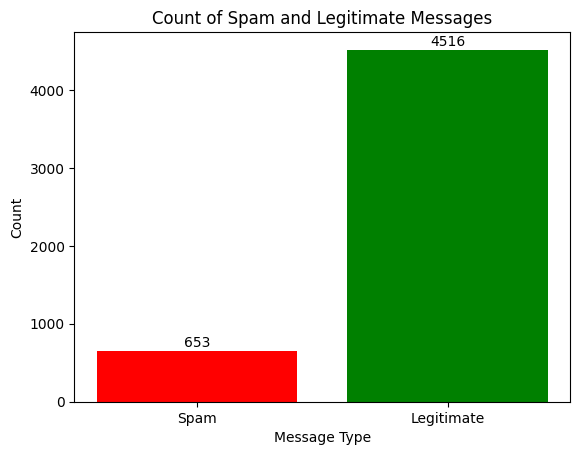

In [10]:

spam_count = len(dataset[dataset['label'] == 'spam'])
legitimate_count = len(dataset[dataset['label'] == 'ham'])
labels = ['Spam', 'Legitimate']
counts = [spam_count, legitimate_count]
colors = ['red', 'green']

plt.bar(labels, counts, color=colors)
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Count of Spam and Legitimate Messages')

for i, count in enumerate(counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.show()


In [11]:
print("\nExamples of spam messages:")
print(dataset[dataset['label'] == 'spam']['message'].head())

print("\nExamples of legitimate messages:")
print(dataset[dataset['label'] == 'ham']['message'].head())


Examples of spam messages:
2     Free entry in 2 a wkly comp to win FA Cup fina...
5     FreeMsg Hey there darling it's been 3 week's n...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
11    SIX chances to win CASH! From 100 to 20,000 po...
Name: message, dtype: object

Examples of legitimate messages:
0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
6    Even my brother is not like to speak with me. ...
Name: message, dtype: object


Models training:

In [12]:
dataset['message'] = dataset['message'].str.lower()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset['message'], dataset['label'], test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [18]:

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_predictions = nb_classifier.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_predictions)

lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_tfidf, y_train)
lr_predictions = lr_classifier.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, lr_predictions)

svm_classifier = SVC()
svm_classifier.fit(X_train_tfidf, y_train)
svm_predictions = svm_classifier.predict(X_test_tfidf)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print(f"Naive Bayes accuracy: {nb_accuracy}")
print(f"Logistic Regression accuracy: {lr_accuracy}")
print(f"Support Vector Machine accuracy: {svm_accuracy}")


Naive Bayes accuracy: 0.9555125725338491
Logistic Regression accuracy: 0.9680851063829787
Support Vector Machine accuracy: 0.9845261121856866


Accuracy:

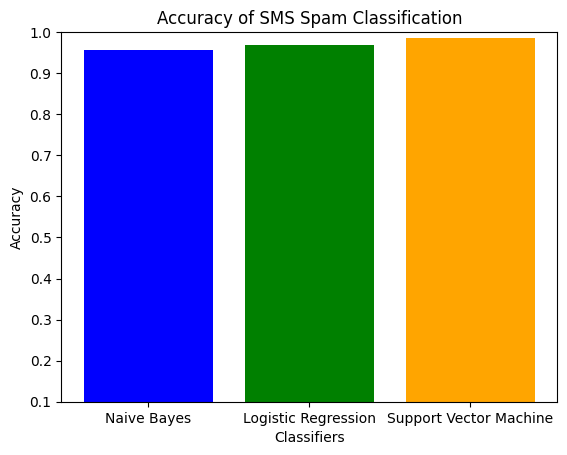

In [19]:

# Create a bar graph
classifiers = ['Naive Bayes', 'Logistic Regression', 'Support Vector Machine']
accuracies = [nb_accuracy, lr_accuracy, svm_accuracy]

plt.bar(classifiers, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of SMS Spam Classification')
plt.ylim(0.1, 1)
plt.show()


TESTING:

In [15]:


# Select a random message from the dataset
random_index = random.randint(0, len(dataset) - 1)
random_message = dataset.iloc[random_index]['message']

# Preprocess the random message
random_message = random_message.lower()
random_message_tfidf = tfidf_vectorizer.transform([random_message])

# Use the models to predict the label
nb_prediction = nb_classifier.predict(random_message_tfidf)[0]
lr_prediction = lr_classifier.predict(random_message_tfidf)[0]
svm_prediction = svm_classifier.predict(random_message_tfidf)[0]

# Display the random message and the predictions
print(f"Random Message: {random_message}")
print(f"Naive Bayes Prediction: {nb_prediction}")
print(f"Logistic Regression Prediction: {lr_prediction}")
print(f"Support Vector Machine Prediction: {svm_prediction}")


Random Message: are u coming to the funeral home
Naive Bayes Prediction: ham
Logistic Regression Prediction: ham
Support Vector Machine Prediction: ham


In [16]:
# Select a random spam message from the dataset
spam_messages = dataset[dataset['label'] == 'spam']
random_index = random.randint(0, len(spam_messages) - 1)
random_message = spam_messages.iloc[random_index]['message']

# Preprocess the random message
random_message = random_message.lower()
random_message_tfidf = tfidf_vectorizer.transform([random_message])

# Use the models to predict the label
nb_prediction = nb_classifier.predict(random_message_tfidf)[0]
lr_prediction = lr_classifier.predict(random_message_tfidf)[0]
svm_prediction = svm_classifier.predict(random_message_tfidf)[0]

# Display the random message and the predictions
print(f"Random Spam Message: {random_message}")
print(f"Naive Bayes Prediction: {nb_prediction}")
print(f"Logistic Regression Prediction: {lr_prediction}")
print(f"Support Vector Machine Prediction: {svm_prediction}")


Random Spam Message: good luck! draw takes place 28th feb 06. good luck! for removal send stop to 87239 customer services 08708034412
Naive Bayes Prediction: ham
Logistic Regression Prediction: ham
Support Vector Machine Prediction: spam


Confusion matrix:

In [17]:
from sklearn.metrics import confusion_matrix

nb_confusion_matrix = confusion_matrix(y_test, nb_predictions)
lr_confusion_matrix = confusion_matrix(y_test, lr_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)

# confusion matrix for Naive Bayes
print("Confusion Matrix for Naive Bayes:")
print(nb_confusion_matrix)
# matrix for Logistic Regression
print("\nConfusion Matrix for Logistic Regression:")
print(lr_confusion_matrix)
# confusion matrix for Support Vector Machine
print("\nConfusion Matrix for Support Vector Machine:")
print(svm_confusion_matrix)


Confusion Matrix for Naive Bayes:
[[889   0]
 [ 46  99]]

Confusion Matrix for Logistic Regression:
[[886   3]
 [ 30 115]]

Confusion Matrix for Support Vector Machine:
[[889   0]
 [ 16 129]]
